In [19]:
import numpy as np
import pandas as pd

In [20]:
power_train = np.genfromtxt("power_plant_gradient_train.csv", delimiter = ",")
power_test = np.genfromtxt("power_plant_gradient_test.csv", delimiter = ",")

In [3]:
df = pd.DataFrame(power_train)

In [4]:
power_train.shape

(7176, 5)

In [21]:
X = power_train[:,0:4]
Y = power_train[:, 4].reshape(-1,1)

# adding features

In [62]:
temp_col = X.shape[1]
temp_df = pd.DataFrame(X)
for i in range(temp_col):
    temp_df[temp_col + i] = temp_df[i] ** 2

extended_x = temp_df.values



# test

temp_col_test = power_test.shape[1]
temp_df_test = pd.DataFrame(power_test)
for i in range(temp_col_test):
    temp_df_test[temp_col_test + i] = temp_df_test[i] ** 2
extended_test = temp_df_test.values



In [6]:
temp_df = pd.DataFrame(X)
temp_df[4] = temp_df[0] ** 2
temp_df[5] = temp_df[1] ** 2
temp_df[6] = temp_df[3] ** 2
extended_x = temp_df.values

# test

temp_df_test = pd.DataFrame(power_test)
temp_df_test[4] = temp_df_test[0] ** 2
temp_df_test[5] = temp_df_test[1] ** 2
temp_df_test[6] = temp_df_test[3] ** 2
extended_test = temp_df_test.values

# scaling

In [22]:
from sklearn import preprocessing

In [23]:
scaler = preprocessing.StandardScaler()

In [24]:
scaler.fit(X)
d = scaler.transform(X)
d_test = scaler.transform(power_test)

In [8]:
scaler1 = preprocessing.StandardScaler()

In [9]:
scaler1.fit(extended_x)
de = scaler1.transform(extended_x)
de_test = scaler1.transform(extended_test)

# adding col of 1's

In [25]:
last_col = X.shape[1]
no_rows = Y.shape[0]
no_rows_test = power_test.shape[0]



In [26]:
add_c = np.ones((no_rows,1))
add_c_test = np.ones((no_rows_test,1)) 

In [27]:
d = np.concatenate((d,add_c), axis = 1)
d_test = np.concatenate((d_test,add_c_test), axis = 1)

#de = np.concatenate((de,add_c), axis = 1)
#de_test = np.concatenate((de_test,add_c_test), axis = 1)
print(d.shape)
print(d_test.shape)
#print(de.shape)
#print(de_test.shape)

(7176, 5)
(2392, 5)


# algo

In [28]:
def step_gradient(points, op, learning_rate, m):
    N = points.shape[1]
    m_slope = np.zeros(N)
    M = len(points)
   
    for i in range(M):
        x = points[i,:]
        y = op[i]
        for j in range(N):
            temp = (-2/M) * ((y - (m*x).sum())*x[j])
            m_slope[j] = temp + m_slope[j]
    new_m = m - learning_rate*m_slope
    
    #print(new_m, new_c)
    return new_m

In [29]:
def gd(points, op, learning_rate, num_iterations):
    N = points.shape[1]
    m = np.zeros(N)
    
    for i in range(num_iterations):
        m = step_gradient(points, op, learning_rate, m)
        #print(i, "cost: ", cost(points, m, c))
    return m




In [44]:
def run(s,l):
    
    
    learning_rate = 0.04
    num_iteration = 700
    m = gd(s, l, learning_rate, num_iteration)
    #print(m)
    return m

# spliting

In [31]:
from sklearn import model_selection

In [32]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(d, Y)

# main

In [45]:
final_m = run(x_train, y_train)


#final_m = run(d, Y)
final_m

array([-1.48872360e+01, -2.92044431e+00,  3.98938208e-01, -2.34846069e+00,
        4.54444620e+02])

# predicting values for test

In [46]:
list1 = list()
for i in range(len(x_test)):
    x = x_test[i,:]
    y_pred = (final_m*x).sum()
    list1.append(y_pred)
list2 = np.array(list1)

# predicting on final_test.csv without extended features



In [38]:
list_test = list()
for i in range(len(d_test)):
    x = d_test[i,:]
    y_pred = (final_m*x).sum()
    list_test.append(y_pred)
list_final = np.array(list_test)

# predicting on final_test.csv with extended features




In [17]:
list_test = list()
for i in range(len(de_test)):
    x = de_test[i,:]
    y_pred = (final_m*x).sum()
    list_test.append(y_pred)
list_final = np.array(list_test)

In [35]:
import matplotlib.pyplot as plt

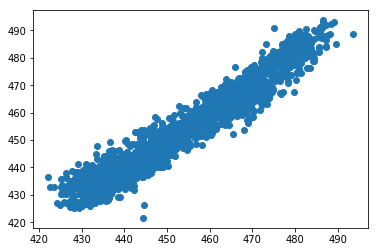

In [47]:
#kl = kl.reshape(379)

plt.scatter(list2,y_test)
plt.show()

In [74]:
list_final.shape

(2392,)

In [39]:
np.savetxt("power_gradientdescent_project_predicted_values5.csv", list_final, delimiter = ",", fmt = '%.5f')